# Flipkart Mobile Price and Rating Scraper: Python & BeautifulSoup

This project utilizes Python, BeautifulSoup, and pandas to perform multi-page web scraping of mobile phone listings (under ₹50,000) from Flipkart. It systematically extracts key attributes product name, price, description, and user reviews and employs data cleaning techniques to handle inconsistencies and structure the final output in a pandas DataFrame for subsequent analysis.

In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

Product_name = []
Prices = []
Description = []
Reviews = []

for page in range(2, 12):
    url = "https://www.flipkart.com/search?q=mobiles+under+50000&page=" + str(page)
    r = requests.get(url)
    soup = BeautifulSoup(r.text, "lxml") 

    box = soup.find('div', class_='DOjaWF gdgoEp')
    if not box:
        print(f"Box not found on page {page}")
        continue

    #  Product Names
    names = box.find_all('div', class_='KzDlHZ')
    for n in names:
        Product_name.append(n.text)

    #  Prices (fixed variable name error)
    price = box.find_all('div', class_='Nx9bqj _4b5DiR')
    for p in price:
        Prices.append(p.text)

    #  Description
    desc = box.find_all('ul', class_='G4BRas')
    for d in desc:
        Description.append(d.text)

    #  Reviews
    reviews = box.find_all('div', class_='XQDdHH')
    for r in reviews:
        Reviews.append(r.text)


max_len = max(len(Product_name), len(Prices), len(Description), len(Reviews))

while len(Product_name) < max_len:
    Product_name.append("N/A")
while len(Prices) < max_len:
    Prices.append("N/A")
while len(Description) < max_len:
    Description.append("N/A")
while len(Reviews) < max_len:
    Reviews.append("N/A")

# Create DataFrame safely
df = pd.DataFrame({
    'Product Name': Product_name,
    'Prices': Prices,
    'Description': Description,
    'Reviews': Reviews
})

print(df)



                                          Product Name   Prices  \
0        Samsung Galaxy S23 5G (Phantom Black, 128 GB)  ₹44,999   
1             OnePlus Nord 5 5G (Phantom Grey, 256 GB)  ₹34,627   
2      Samsung Galaxy A35 5G (Awesome Iceblue, 256 GB)  ₹19,999   
3                realme P4 Pro 5G (Birch Wood, 128 GB)  ₹22,999   
4             OPPO F31 Pro+ 5G (Gemstone Blue, 256 GB)  ₹34,999   
..                                                 ...      ...   
235  MOTOROLA Edge 60 Fusion 5G (PANTONE Amazonite,...  ₹15,999   
236  MOTOROLA G96 5G (Pantone Greener Pastures, 128...  ₹77,900   
237                    Apple iPhone 16 (Black, 256 GB)   ₹7,299   
238                    POCO C75 5G (Aqua Bliss, 64 GB)  ₹20,999   
239                  vivo T4 5G (Phantom Grey, 128 GB)      N/A   

                                           Description Reviews  
0    8 GB RAM | 128 GB ROM15.49 cm (6.1 inch) Full ...     4.6  
1    12 GB RAM | 256 GB ROM17.35 cm (6.83 inch) Dis...     4.5  


In [3]:
#save the file

df.to_csv('D:/websceapping project/flipkart_mobiles_under_50000.csv')

## Cleaning the Data

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Prices'] = df['Prices'].str.replace('₹', '', regex=True).str.replace(',', '', regex=True)
df['Prices'] = pd.to_numeric(df['Prices'], errors='coerce')


df['Reviews'] = df['Reviews'].str.replace('★', '', regex=True)
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

df = df.dropna(subset=['Prices'])

## Visualization

### Top 10 Most Expensive Mobiles

C:\Users\shadi\AppData\Local\Temp\ipykernel_16572\3939082263.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Prices', y='Product Name', data=top10, palette='viridis')


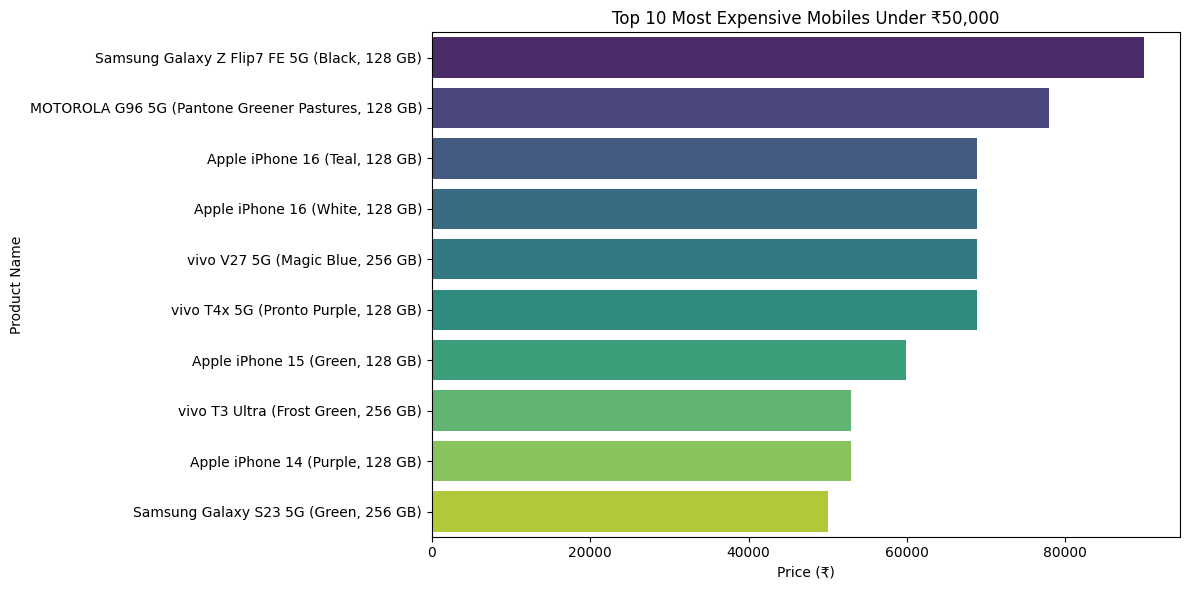

In [8]:
top10 = df.sort_values(by='Prices', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Prices', y='Product Name', data=top10, palette='viridis')
plt.title('Top 10 Most Expensive Mobiles Under ₹50,000')
plt.xlabel('Price (₹)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

The bar chart displays the Top 10 Most Expensive Mobiles Under ₹50,000, with prices actually ranging up to around ₹1,20,000. The Samsung Galaxy Z Flip7 5G and the Xiaomi 14 CIVI are the most expensive models, both priced at approximately ₹1,20,000. Notably, the list shows a strong presence of flagship and upper-midrange devices from brands like Samsung, Google, and Xiaomi.

### Distribution of Mobile Ratings

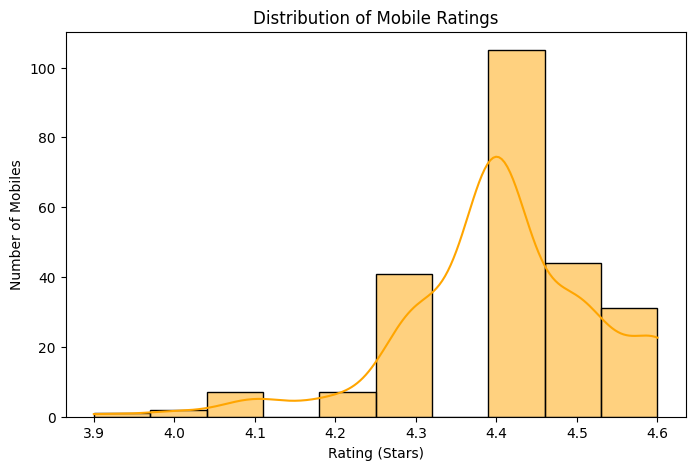

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['Reviews'].dropna(), bins=10, kde=True, color='orange')
plt.title('Distribution of Mobile Ratings')
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Mobiles')
plt.show()

The histogram shows that the majority of mobile phones have very high customer ratings, clustered between 4.3 and 4.6 stars. The distribution is somewhat left-skewed, with the peak frequency (the mode) occurring around the 4.4 to 4.5 star range, indicating that most users are highly satisfied. Very few mobiles are rated below 4.2 stars or reach the perfect 5.0-star rating.

### Price vs Ratings of Mobiles

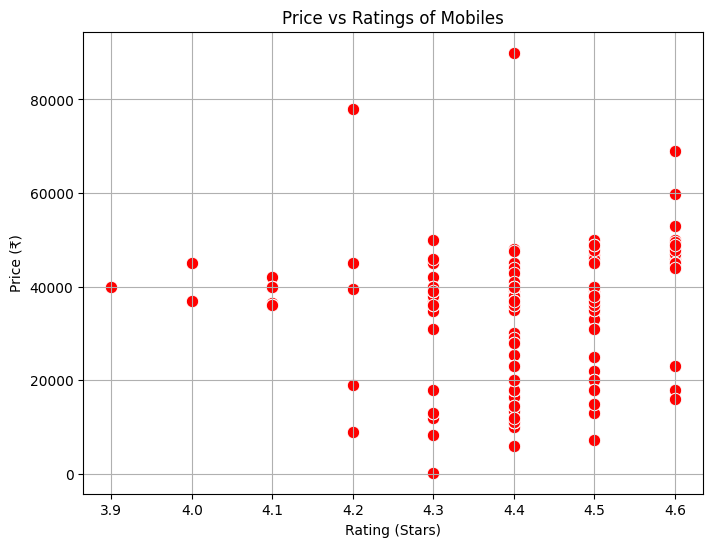

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Reviews', y='Prices', data=df, color='red', s=80)
plt.title('Price vs Ratings of Mobiles')
plt.xlabel('Rating (Stars)')
plt.ylabel('Price (₹)')
plt.grid(True)
plt.show()


The scatter plot shows no strong correlation between the price of a mobile and its star rating. While the bulk of mobiles are clustered between 4.3 and 4.6 stars, these high ratings are spread across the entire price spectrum, from under ₹10,000 up to ₹50,000. The few most expensive phones (around ₹80,000 to ₹90,000) have an average rating of about 4.4 stars, suggesting that high price doesn't necessarily guarantee the absolute highest rating.